### Import libraries

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

### Import data, clean and filter
Filter data based on the following criteria:
- delete responses before Oct 23rd? (I think it's somewhere around this date)
- identify and remove duplicate responses
- identify and remove "test" or "preview" responses
- check duration - if survey was completed super quick, probably not a good response

In [13]:
# Before loading your data, set display options so you can visualize the max number of columns and rows
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)


In [14]:
df = pd.read_csv('Robot.csv')
df

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,"Consent ""Form""",NARS_1,NARS_2,NARS_3,NARS_4,NARS_5,NARS_6,NARS_7,NARS_8,NARS_9,NARS_10,NARS_11,PARS_12,PARS_13,PARS_14,PARS_15,PARS_16,PARS_17,Prior Experience q1,Prior Experience q2,Prior Experience q2_3_TEXT,Prior Experience q3,Prior Experience q4,Prior Experience q4_1_TEXT,Manipulation Check,Godspeed_1,Godspeed_2,Godspeed_3,Godspeed_4,Godspeed_5,Godspeed_6,Godspeed_7,Godspeed_8,Godspeed_9,Godspeed_10,Godspeed_11,Godspeed_12,Godspeed_13,Godspeed_14,Godspeed_15,Potency_1,Potency_2,Potency_3,Potency_4,Potency_5,Potency_6,Potency_7,Potency_8,Potency_9,Potency_10,Potency_11,Potency_12,Potency_13,Potency_14,Potency_15,Potency_16,Potency_17,Potency_18,Potency_19,Potency_20,Potency_21,Comprehension Check,Trust Likelihood_1,The TG,Age,Gender,Race/Ethnicity,id,Condition
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,Recipient First Name,Recipient Email,External Data Reference,Location Latitude,Location Longitude,Distribution Channel,User Language,Consent,NARS - I would feel uneasy if I was given a jo...,"NARS - The word ""robot"" means nothing to me.",NARS - I would feel nervous operating a robot ...,NARS - I would hate the idea that robots or ar...,NARS - I would feel very nervous just standing...,NARS - I would feel paranoid talking with a ro...,NARS - I would feel uneasy if robots really ha...,NARS - Something bad might happen if robots de...,NARS - I feel that if I depend on robots too m...,NARS - I am concerned that robots would be a b...,NARS - I feel that in the future society will ...,"NARS - I feel that in the future, robots will ...",NARS - I would feel relaxed talking with robots.,"NARS - If robots had emotions, I would be able...",NARS - I feel that I could make friends with r...,NARS - I feel comforted being with robots that...,NARS - I feel comfortable being with robots.,Prior Exp 1,Prior Exp 2 - Selected Choice,Prior Exp 2 - Other - Text,Prior Exp 3,Prior Exp 4 - Selected Choice,Prior Exp 4 - Other - Text,Manipulation Check,Godspeed - Fake:Natural,Godspeed - Machinelike:Humanlike,Godspeed - Unconscious:Conscious,Godspeed - Artificial:Likelike,Godspeed - Moving rigidly:Moving elegantly,Godspeed - Dislike:Like,Godspeed - Unfriendly:Friendly,Godspeed - Unkind:Kind,Godspeed - Unpleasant:Pleasant,Godspeed - Awful:Nice,Godspeed - Incompetent:Competent,Godspeed - Ignorant:Knowledgable,Godspeed - Irresponsible:Responsible,Godspeed - Unintelligent:Intelligent,Godspeed - Foolish:Sensiible,Potency - Not ambitious:Ambitious,Potency - Unassertive:Assertive,Potency - Noncompetitive:Competitive,Potency - Dependent:Independent,Potency - Follower:Leader,Potency - Immature:Mature,Potency - Indecisive:Decisive,Potency - Inefficient:Efficient,Potency - Submissive:Dominant,Potency - Unaggressive:Aggressive,Potency - Weak:Strong,Potency - Gentle:Harsh,Potency - Dishonest:Honest,Potency - Quiet:Loud,Potency - Masculine:Feminine,Potency - Conforming:Nonconforming,Potency - Rational:Irrational,Potency - Selfish:Generous,Potency - Sick:Healthy,Potency - Unsociable:Sociable,Potency - Untrustworthy:Trustworthy,Comprehension Check,Likelihood,TG,Age,Gender,Race,id,Condition
1,"{""ImportId"":""startDate"",""timeZone"":""America/De...","{""ImportId"":""endDate"",""timeZone"":""America/Denv...","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}","{""ImportId"":""recipientFirstName""}","{""ImportId"":""recipientEmail""}","{""ImportId"":""externalDataReference""}","{""ImportId"":""locationLatitude""}","{""Impor

In [ ]:
# Set display options so you can visualize the max number of columns and rows
pd.set_option('display.max_columns',None)


In [12]:
# Drop irrelevant columns
#df_drop = df.drop(['StartDate', 'EndDate','IPAddress','Progress'], axis=1)
df.drop(columns=df.columns[1:17], inplace=True)
df

#ensure that you've dropped the Start Dat after DATE, the duration if shorter than 2minutes 

,StartDate,"Consent ""Form""",NARS_1,NARS_2,NARS_3,NARS_4,NARS_5,NARS_6,NARS_7,NARS_8,...,Potency_20,Potency_21,Comprehension Check,Trust Likelihood_1,The TG,Age,Gender,Race/Ethnicity,id,Condition
0,Start Date,Consent,NARS - I would feel uneasy if I was given a jo...,"NARS - The word ""robot"" means nothing to me.",NARS - I would feel nervous operating a robot ...,NARS - I would hate the idea that robots or ar...,NARS - I would feel very nervous just standing...,NARS - I would feel paranoid talking with a ro...,NARS - I would feel uneasy if robots really ha...,NARS - Something bad might happen if robots de...,...,Potency - Unsociable:Sociable,Potency - Untrustworthy:Trustworthy,Comprehension Check,Likelihood,TG,Age,Gender,Race,id,Condition
1,"{""ImportId"":""startDate"",""timeZone"":""America/De...","{""ImportId"":""QID32""}","{""ImportId"":""QID12_1""}","{""ImportId"":""QID12_2""}","{""ImportId"":""QID12_3""}","{""ImportId"":""QID12_4""}","{""ImportId"":""QID12_5""}","{""ImportId"":""QID12_6""}","{""ImportId"":""QID12_7""}","{""ImportId"":""QID12_8""}",...,"{""ImportId"":""QID33_20""}","{""ImportId"":""QID33_21""}","{""ImportId"":""QID21""}","{""ImportId"":""QID23_1""}","{""ImportId"":""QID22""}","{""ImportId"":""QID1320796634_TEXT""}","{""ImportId"":""QID1320796635_TEXT""}","{""ImportId"":""QID62""}","{""ImportId"":""id""}","{""ImportId"":""Condition""}"
2,2025-01-16 10:51:21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Correct,NaN,NaN,21,Girl,NaN,NaN,NaN
3,2025-02-20 14:28:25,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Correct,10,Send,X,X,NaN,NaN,NaN
4,2025-04-10 12:14:41,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Correct,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,2025-11-15 14:10:45,Yes,2,2,2,2,1,1,3,3,...,7,4,Correct,9,Send,18,Male,"White or Causasian,American Indian/Native Amer...",128314,3a
161,2025-11-17 15:04:23,Yes,3,4,4,3,3,4,3,4,...,4,4,Correct,8,Send,19,female,Asian,121453,2a
162,2025-11-18 18:25:23,Yes,2,2,2,1,1,2,4,3,...,5,5,Correct,5,Send,18,man,Asian,128979,2b
163,2025-11-19 18:51:27,Yes,2,2,3,2,2,2,4,4,...,6,6,Correct,7,Send,20,female,Asian,120063,4c


In [15]:
df.drop(df.index[0:67], inplace = True) # here, if you use the "inplace = True" argument, then you don't need to create a new variable
df 

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,"Consent ""Form""",NARS_1,NARS_2,NARS_3,NARS_4,NARS_5,NARS_6,NARS_7,NARS_8,NARS_9,NARS_10,NARS_11,PARS_12,PARS_13,PARS_14,PARS_15,PARS_16,PARS_17,Prior Experience q1,Prior Experience q2,Prior Experience q2_3_TEXT,Prior Experience q3,Prior Experience q4,Prior Experience q4_1_TEXT,Manipulation Check,Godspeed_1,Godspeed_2,Godspeed_3,Godspeed_4,Godspeed_5,Godspeed_6,Godspeed_7,Godspeed_8,Godspeed_9,Godspeed_10,Godspeed_11,Godspeed_12,Godspeed_13,Godspeed_14,Godspeed_15,Potency_1,Potency_2,Potency_3,Potency_4,Potency_5,Potency_6,Potency_7,Potency_8,Potency_9,Potency_10,Potency_11,Potency_12,Potency_13,Potency_14,Potency_15,Potency_16,Potency_17,Potency_18,Potency_19,Potency_20,Potency_21,Comprehension Check,Trust Likelihood_1,The TG,Age,Gender,Race/Ethnicity,id,Condition
67,2025-10-23 12:56:09,2025-10-23 13:05:22,IP Address,168.150.13.161,100,553,True,2025-10-23 13:05:22,R_60N5l5ib5C1PKkQ,NaN,NaN,NaN,NaN,38.5559,-121.7391,anonymous,EN,Yes,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,6-10,"Yes, personal assistant robots (e.g., Siri, Al...",NaN,Yes,Other,NaN,A,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,Correct,5,Send,test,test,Native Hawaiian or Other Pacific Islander,NaN,2a
68,2025-10-23 14:16:41,2025-10-23 14:24:15,IP Address,168.150.3.85,100,454,True,2025-10-23 14:24:15,R_3S0qujQZRl6BgIB,NaN,NaN,NaN,NaN,38.5559,-121.7391,anonymous,EN,Yes,3,3,4,4,4,4,3,4,5,5,4,4,1,1,1,2,1,1-5,"Yes, personal assistant robots (e.g., Siri, Al...",NaN,No,No,NaN,B,3,2,4,2,3,3,4,4,3,4,3,4,4,3,3,3,5,3,5,4,4,4,5,4,2,5,3,6,3,4,3,4,6,5,5,6,Correct,6,Send,19,female,Prefer not to say,126777,4b
69,2025-10-23 14:33:03,2025-10-23 14:37:52,IP Address,168.150.39.22,100,289,True,2025-10-23 14:37:52,R_14oNUqipxUetukH,NaN,NaN,NaN,NaN,38.5559,-121.7391,anonymous,EN,Yes,4,2,3,4,3,2,5,3,3,4,3,4,2,3,3,1,2,6-10,"Yes, personal assistant robots (e.g., Siri, Al...",NaN,No,No,NaN,B,2,2,4,2,1,4,3,3,4,3,3,3,3,4,4,4,3,4,5,2,4,3,3,4,3,5,4,4,3,4,3,3,4,5,4,5,Correct,5,Send,20,female,White or Causasian,119357,1b
70,2025-10-23 14:56:05,2025-10-23 15:01:03,IP Address,128.120.67.160,100,297,True,2025-10-23 15:01:03,R_5pyd7lYY1I99gZ4,NaN,NaN,NaN,NaN,38.5559,-121.7391,anonymous,EN,Yes,3,3,1,3,3,3,3,3,3,2,3,3,3,3,2,2,3,1-5,"Yes, personal assistant robots (e.g., Siri, Al...",NaN,Yes,Other,NaN,C,3,1,3,1,3,3,3,3,3,3,3,3,3,2,3,1,4,1,2,3,1,4,3,3,1,4,3,4,3,2,4,4,4,3,4,4,Correct,5,Send,18,female,Asian,128883,1c
71,2025-10-23 17:30:18,2025-10-23 17:36:26,IP Address,128.120.77.83,100,367,True,2025-10-23 17:36:26,R_5RbuzSzSfEjPlwB,NaN,NaN,NaN,NaN,38.5559,-121.7391,anonymous,EN,Yes,1,3,5,4,4,5,5,4,5,5,4,3,1,2,1,1,1,11-15,"Yes, personal assistant robots (e.g., Siri, Al...",NaN,Yes,Other,NaN,A,1,2,1,3,2,3,5,4,1,3,3,4,4,2,4,1,5,4,4,3,3,5,2,4,3,7,2,2,1,4,1,4,5,4,3,1,Correct,9,Send,19,f,"White or Causasian,Black or African American",123998,2c
72,2025-10-23 19:26:17,2025-10-23 19:33:00,IP Address,67.182.75.213,100,402,True,2025-10-23 19:33:00,R_6hIvhiQ9Uo2ByLL,NaN,NaN,NaN,NaN,38.4965,-121.5348,anonymous,EN,Yes,4,2,4,5,3,4,4,4,5,3,4,2,2,3,2,2,2,1-5,"Yes, personal assistant robots (e.g., Siri, Al...",NaN,Yes,Other,NaN,C,3,1,5,5,5,4,5,5,3,5,4,5,5,5,5,4,4,4,6,4,7,7,7,4,4,4,4,6,3,4,4,3,7,7,6,7,Correct,6,Send,18,Female,Other,128337,4c
73,2025-10-23 19:39:17,2025-10-23 19:45:26,IP Address,174.221.65.158,100,369,True,2025-10-23 19:45:27,R_6b1sX0doYWXvOib,NaN,NaN,NaN,NaN,38.482,-121.4015,anonymous,EN,Yes,5,3,1,5,5,3,5,5,5,3,3,3,1,1,3,1,1,15+,No,NaN,No,No,NaN,C,1,1,3,1,3,3,3,3,1,3,3,3,3,3,1,7,4,4,1,1,4,4,4,4,4,4,1,4,4,4,4,4,4,4,7,4,Correct,6,Send,19,Female,Other,128856,3c
74,2025-10-23 19:43:00,2025-10-23 19:51:54,IP Address,168.150.102.92,100,533,True,2025-10-23 19:51:55,R_6hFqHf376zMuF0Z,NaN,NaN,NaN,NaN,38.5559,-121.7391,anonymous,EN,Yes,1,5,1,5,2,1,2,5,5,5,3,3,4

In [ ]:
df.drop([67,115,153,155], inplace = True) #the deletion of bad data
df

,StartDate,"Consent ""Form""",NARS_1,NARS_2,NARS_3,NARS_4,NARS_5,NARS_6,NARS_7,NARS_8,...,Potency_20,Potency_21,Comprehension Check,Trust Likelihood_1,The TG,Age,Gender,Race/Ethnicity,id,Condition
68,2025-10-23 14:16:41,Yes,3,3,4,4,4,4,3,4,...,5,6,Correct,6,Send,19,female,Prefer not to say,126777,4b
69,2025-10-23 14:33:03,Yes,4,2,3,4,3,2,5,3,...,4,5,Correct,5,Send,20,female,White or Causasian,119357,1b
70,2025-10-23 14:56:05,Yes,3,3,1,3,3,3,3,3,...,4,4,Correct,5,Send,18,female,Asian,128883,1c
71,2025-10-23 17:30:18,Yes,1,3,5,4,4,5,5,4,...,3,1,Correct,9,Send,19,f,"White or Causasian,Black or African American",123998,2c
72,2025-10-23 19:26:17,Yes,4,2,4,5,3,4,4,4,...,6,7,Correct,6,Send,18,Female,Other,128337,4c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,2025-11-15 14:10:45,Yes,2,2,2,2,1,1,3,3,...,7,4,Correct,9,Send,18,Male,"White or Causasian,American Indian/Native Amer...",128314,3a
161,2025-11-17 15:04:23,Yes,3,4,4,3,3,4,3,4,...,4,4,Correct,8,Send,19,female,Asian,121453,2a
162,2025-11-18 18:25:23,Yes,2,2,2,1,1,2,4,3,...,5,5,Correct,5,Send,18,man,Asian,128979,2b
163,2025-11-19 18:51:27,Yes,2,2,3,2,2,2,4,4,...,6,6,Correct,7,Send,20,female,Asian,120063,4c


In [ ]:
# Source - https://stackoverflow.com/questions/28538536/deleting-multiple-columns-based-on-column-names
# Posted by Peadar Coyle
# Retrieved 2025-11-06, License - CC BY-SA 4.0

#df.drop(df.columns[[1, 2, 3, 4, 
#5, 6, 7, 8, 9,]], axis=1, inplace=True)


In [ ]:
# You can use this command to change how many rows are displayed throughout the code so it's not always showing the max
pd.set_option('display.max_rows', 5)


In [18]:
# Create a new column that extracts the number part (1, 2, 3, etc.)
df['group'] = df['Condition'].str.extract(r'(\d+)')
df

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,"Consent ""Form""",NARS_1,NARS_2,NARS_3,NARS_4,NARS_5,NARS_6,NARS_7,NARS_8,NARS_9,NARS_10,NARS_11,PARS_12,PARS_13,PARS_14,PARS_15,PARS_16,PARS_17,Prior Experience q1,Prior Experience q2,Prior Experience q2_3_TEXT,Prior Experience q3,Prior Experience q4,Prior Experience q4_1_TEXT,Manipulation Check,Godspeed_1,Godspeed_2,Godspeed_3,Godspeed_4,Godspeed_5,Godspeed_6,Godspeed_7,Godspeed_8,Godspeed_9,Godspeed_10,Godspeed_11,Godspeed_12,Godspeed_13,Godspeed_14,Godspeed_15,Potency_1,Potency_2,Potency_3,Potency_4,Potency_5,Potency_6,Potency_7,Potency_8,Potency_9,Potency_10,Potency_11,Potency_12,Potency_13,Potency_14,Potency_15,Potency_16,Potency_17,Potency_18,Potency_19,Potency_20,Potency_21,Comprehension Check,Trust Likelihood_1,The TG,Age,Gender,Race/Ethnicity,id,Condition,group
67,2025-10-23 12:56:09,2025-10-23 13:05:22,IP Address,168.150.13.161,100,553,True,2025-10-23 13:05:22,R_60N5l5ib5C1PKkQ,NaN,NaN,NaN,NaN,38.5559,-121.7391,anonymous,EN,Yes,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,6-10,"Yes, personal assistant robots (e.g., Siri, Al...",NaN,Yes,Other,NaN,A,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,Correct,5,Send,test,test,Native Hawaiian or Other Pacific Islander,NaN,2a,2
68,2025-10-23 14:16:41,2025-10-23 14:24:15,IP Address,168.150.3.85,100,454,True,2025-10-23 14:24:15,R_3S0qujQZRl6BgIB,NaN,NaN,NaN,NaN,38.5559,-121.7391,anonymous,EN,Yes,3,3,4,4,4,4,3,4,5,5,4,4,1,1,1,2,1,1-5,"Yes, personal assistant robots (e.g., Siri, Al...",NaN,No,No,NaN,B,3,2,4,2,3,3,4,4,3,4,3,4,4,3,3,3,5,3,5,4,4,4,5,4,2,5,3,6,3,4,3,4,6,5,5,6,Correct,6,Send,19,female,Prefer not to say,126777,4b,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,2025-11-19 18:51:27,2025-11-19 19:00:27,IP Address,76.78.246.236,100,540,True,2025-11-19 19:00:28,R_7H1CKscS3SgTrVf,NaN,NaN,NaN,NaN,38.5559,-121.7391,anonymous,EN,Yes,2,2,3,2,2,2,4,4,4,3,4,4,3,1,1,2,3,6-10,"Yes, personal assistant robots (e.g., Siri, Al...",NaN,No,Other,NaN,C,1,1,4,1,2,3,5,3,4,4,3,4,4,4,4,5,5,4,6,4,6,6,6,5,2,6,4,6,6,3,5,3,4,4,6,6,Correct,7,Send,20,female,Asian,120063,4c,4
164,2025-11-20 18:22:38,2025-11-20 18:54:41,IP Address,12.116.122.46,100,1923,True,2025-11-20 18:54:42,R_3QSVVBHGUeZAgwi,NaN,NaN,NaN,NaN,38.581,-121.4939,anonymous,EN,Yes,1,1,1,2,1,2,2,5,4,3,4,5,3,4,4,2,4,11-15,"Yes, personal assistant robots (e.g., Siri, Al...",NaN,Yes,Other,NaN,B,2,2,2,2,1,3,4,4,4,4,3,3,4,3,3,4,4,4,3,4,4,4,6,4,3,4,4,5,4,4,4,3,5,4,6,5,Correct,5,Send,19,Male,Asian,127887,1b,1


In [ ]:
# Now you can group by 'group'
# This creates another column in your dataframe called "group"
grouped = df.groupby('group')
for g, data in grouped:
    print(f"Group {g}")
    print(data)
    print()

type(grouped) 
    

Group 1
               StartDate              EndDate      Status       IPAddress  \
69   2025-10-23 14:33:03  2025-10-23 14:37:52  IP Address   168.150.39.22   
70   2025-10-23 14:56:05  2025-10-23 15:01:03  IP Address  128.120.67.160   
..                   ...                  ...         ...             ...   
152  2025-11-05 12:46:46  2025-11-05 12:57:17  IP Address  128.120.73.218   
164  2025-11-20 18:22:38  2025-11-20 18:54:41  IP Address   12.116.122.46   

    Progress Duration (in seconds) Finished         RecordedDate  \
69       100                   289     True  2025-10-23 14:37:52   
70       100                   297     True  2025-10-23 15:01:03   
..       ...                   ...      ...                  ...   
152      100                   630     True  2025-11-05 12:57:17   
164      100                  1923     True  2025-11-20 18:54:42   

            ResponseId RecipientLastName RecipientFirstName RecipientEmail  \
69   R_14oNUqipxUetukH               NaN  

pandas.core.groupby.generic.DataFrameGroupBy

In [26]:
pd.set_option('display.max_rows',None)


In [27]:
# you don't need this step, you data "df" is already a dataframe
# df_wide = pd.DataFrame(df)
# df_wide

# instead you can call the melt function directly on the df
df_long = pd.melt(df)
df_long


,variable,value
0,StartDate,2025-10-23 12:56:09
1,StartDate,2025-10-23 14:16:41
2,StartDate,2025-10-23 14:33:03
3,StartDate,2025-10-23 14:56:05
4,StartDate,2025-10-23 17:30:18
5,StartDate,2025-10-23 19:26:17
6,StartDate,2025-10-23 19:39:17
7,StartDate,2025-10-23 19:43:00
8,StartDate,2025-10-23 20:04:56
9,StartDate,2025-10-23 22:45:27


In [ ]:
# df_first_nars5 = df_first_1000.head(134)

# df_first_nars5 = df_first_nars5.iloc[2:] #this deleted the first two rows bc they were words 
# #iloc = index - location --> accessing rows/columns by integers not positions 


# #below attempt to delte any NaN values
# df_first_nars5 = df_first_nars5.dropna(subset=[df_first_nars5.columns[1]])
# # dropna = drops rows with NaN


# #attempt to get mean on NARS5 vlaues 
# #df_first_nars5["value"].mean()
# df_first_nars5.describe()


# df_first_nars5


# #attempt to plot histogram of values? 

# values = df_first_nars5.columns[1]  
# #changed from object to integer below
# df_first_nars5[values] = pd.to_numeric(df_first_nars5[values])
# print(df_first_nars5[values].dtype) #this checs if object or itneger/float, ensure int!!!


# plt.figure()
# df_first_nars5[values].plot(kind='hist')
# plt.xlabel(values)
# plt.ylabel("Amount")
# plt.title("NARS 5: I would feel very nervous just standing in front of a robot")
# plt.show()

In [ ]:
#Attempt to work on NARS 6 
#df_first_nars6 = df_first_1000.iloc[134:268]

#df_first_nars6 = df_first_nars6.iloc[2:]
#df_first_nars6 = df_first_nars6.dropna(subset=[df_first_nars6.columns[1]])
#df_first_nars6


#copied from cell above 
#values6 = df_first_nars6.columns[1]  
#changed from object to integer below
#df_first_nars6[values6] = pd.to_numeric(df_first_nars6[values6])


#plt.figure()
#df_first_nars6[values6].plot(kind='hist')
#plt.xlabel(values6)
#plt.ylabel("Amount")
#plt.title("NARS 6: I would feel paranoid talking with a robot")
#plt.show()


In [31]:
pd.set_option('display.max_rows',10)

In [32]:
df_long3columns = df.melt(
    id_vars=["group","id", "The TG"],         # column that stays as-is
    var_name="variable",       # new column for variable names
    value_name="value"         # new column for values
)

df_long3columns



,group,id,The TG,variable,value
0,2,NaN,Send,StartDate,2025-10-23 12:56:09
1,4,126777,Send,StartDate,2025-10-23 14:16:41
2,1,119357,Send,StartDate,2025-10-23 14:33:03
3,1,128883,Send,StartDate,2025-10-23 14:56:05
4,2,123998,Send,StartDate,2025-10-23 17:30:18
...,...,...,...,...,...
8227,3,128314,Send,Condition,3a
8228,2,121453,Send,Condition,2a
8229,2,128979,Send,Condition,2b
8230,4,120063,Send,Condition,4c


In [33]:
# Select rows in the column "variable" wher the value is condition
df_longONLYconditon = df_long3columns[df_long3columns["variable"] == "Condition"]
df_longONLYconditon

# Replace send and keep values with 1 and and 0
df_longONLYconditon=df_longONLYconditon.replace(to_replace=["Send"],value=1)
df_longONLYconditon=df_longONLYconditon.replace(to_replace=["Keep"],value=0)
df_longONLYconditon

C:\Users\akana\AppData\Local\Temp\ipykernel_28564\946664344.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_longONLYconditon=df_longONLYconditon.replace(to_replace=["Keep"],value=0)


,group,id,The TG,variable,value
8134,2,NaN,1.0,Condition,2a
8135,4,126777,1.0,Condition,4b
8136,1,119357,1.0,Condition,1b
8137,1,128883,1.0,Condition,1c
8138,2,123998,1.0,Condition,2c
...,...,...,...,...,...
8227,3,128314,1.0,Condition,3a
8228,2,121453,1.0,Condition,2a
8229,2,128979,1.0,Condition,2b
8230,4,120063,1.0,Condition,4c


In [34]:
df_longONLYconditon = df_longONLYconditon.sort_values(['group', 'id'])
df_longONLYconditon

,group,id,The TG,variable,value
8189,1,107442,1.0,Condition,1c
8161,1,110925,0.0,Condition,1c
8208,1,115624,1.0,Condition,1a
8199,1,118208,1.0,Condition,1c
8136,1,119357,1.0,Condition,1b
...,...,...,...,...,...
8211,4,128870,1.0,Condition,4c
8180,4,128931,1.0,Condition,4a
8187,4,129019,0.0,Condition,4a
8220,NaN,117915,NaN,Condition,NaN


In [35]:
# Drop NA values
df_longONLYconditon = df_longONLYconditon.dropna()
df_longONLYconditon

,group,id,The TG,variable,value
8189,1,107442,1.0,Condition,1c
8161,1,110925,0.0,Condition,1c
8208,1,115624,1.0,Condition,1a
8199,1,118208,1.0,Condition,1c
8136,1,119357,1.0,Condition,1b
...,...,...,...,...,...
8175,4,128851,1.0,Condition,4c
8188,4,128861,1.0,Condition,4b
8211,4,128870,1.0,Condition,4c
8180,4,128931,1.0,Condition,4a


In [37]:
df_longONLYconditon["The TG"].dtype

dtype('float64')

In [39]:
# The values in "The TG" column are already floats, so you don't need this step
# df_longONLYconditon["The TG"] = pd.to_numeric(df_longONLYconditon["The TG"], errors="coerce")
# df_longONLYconditon["The TG"].dtype

In [ ]:
# Because you set the Send values to 1 and keep to 0, here you're essentially calculating the percentage of send responses per group (i.e. adding up all the 1s and 
# dividing by total responses)

group_means = df_longONLYconditon.groupby("group")["The TG"].mean() 
group_means
#turn this into a boxplot! - TO DO 

,The TG
group,
1,82.608696
2,83.333333
3,70.833333
4,79.166667


(0.0, 100.0)

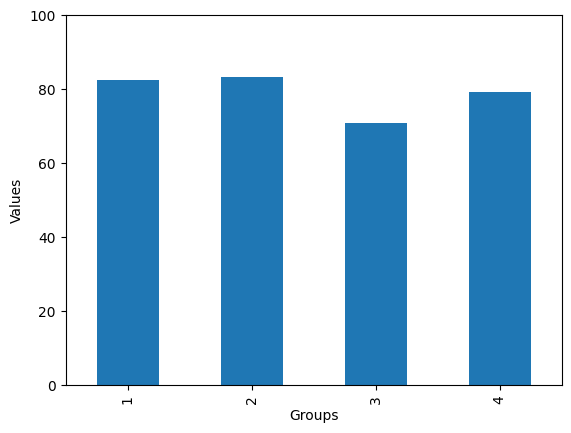

In [ ]:
# Example way to create quick bar plot
df_longONLYconditon.groupby('group')['The TG'].mean().plot(kind = "bar")
plt.ylabel("Values")
plt.xlabel("Groups")
plt.ylim(0,100)


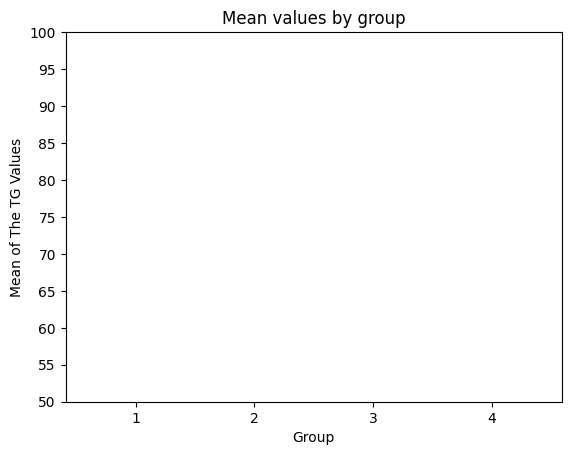

In [42]:
#import matplotlib.pyplot as plt # you already have this import at the top
plt.bar(group_means.index.astype(str), group_means.values)


# data1 = df_longONLYconditon.loc[df_longONLYconditon["group"] == 1, "The TG"].values
# data2 = df_longONLYconditon.loc[df_longONLYconditon["group"] == 2, "The TG"].values
# data3 = df_longONLYconditon.loc[df_longONLYconditon["group"] == 3, "The TG"].values
# data4 = df_longONLYconditon.loc[df_longONLYconditon["group"] == 4, "The TG"].values
# import matplotlib.pyplot as plt

# colors = ["#FFB6C1", "#FF87AB", "#FF69B4", "#FF1493"]  # 4 pinks

# plt.hist(data1, bins=30, color=colors[0], alpha=0.6, label="Group 1")
# plt.hist(data2, bins=30, color=colors[1], alpha=0.6, label="Group 2")
# plt.hist(data3, bins=30, color=colors[2], alpha=0.6, label="Group 3")
# plt.hist(data4, bins=30, color=colors[3], alpha=0.6, label="Group 4")


plt.xlabel("Group")
plt.ylabel("Mean of The TG Values")
plt.ylim(50,100)
plt.yticks(range(50, 101, 5))

plt.title("Mean values by group")

plt.show()


Lengths per group: [0, 0, 0, 0]


C:\Users\akana\AppData\Local\Temp\ipykernel_28564\225335937.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_longONLYconditon[percent_col] = pd.to_numeric(
C:\Users\akana\AppData\Local\Temp\ipykernel_28564\225335937.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_longONLYconditon[percent_col] = df_longONLYconditon[percent_col] * 100


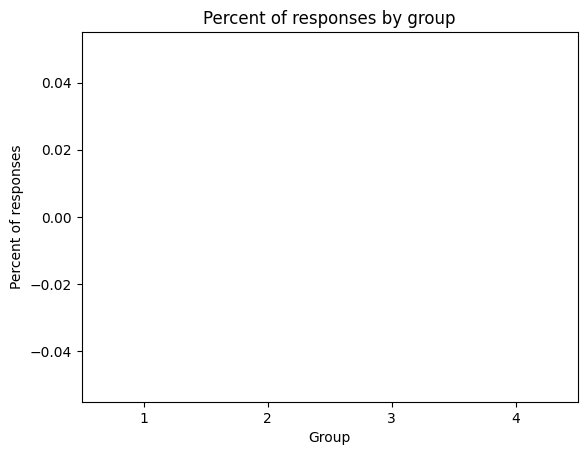

In [43]:
#creating boxplot 

percent_col = "The TG"   

df_longONLYconditon[percent_col] = pd.to_numeric(
    df_longONLYconditon[percent_col],
    errors="coerce"
)

df_longONLYconditon[percent_col] = df_longONLYconditon[percent_col] * 100

groups = [1, 2, 3, 4]

# Collect data for each group
data = [
    df_longONLYconditon.loc[df_longONLYconditon["group"] == g, percent_col].values
    for g in groups
]

print("Lengths per group:", [len(d) for d in data])  # optional: see how many points each has

plt.figure()
plt.boxplot(data, positions=range(1, len(groups) + 1))
plt.xticks(range(1, len(groups) + 1), groups)

plt.xlabel("Group")
plt.ylabel("Percent of responses")
plt.title("Percent of responses by group")

plt.show()

In [ ]:
#this is just to confirm that I have te same values for grous and TG 
print(df_longONLYconditon["group"].value_counts())
print(df_longONLYconditon.groupby("group")["The TG"].count())


percent_col = "The TG"   # or whatever column you’re using on the y axis

print("dtype:", df_longONLYconditon[percent_col].dtype)
print("unique values:", df_longONLYconditon[percent_col].unique())

print(
    df_longONLYconditon
    .groupby("group")[percent_col]
    .agg(["count", "min", "max"])
)


In [ ]:
# frequency table
freq = pd.crosstab(df['group'], df['The TG'])

# create bar plot
freq.plot(kind='bar')

plt.xlabel('Group')
plt.ylabel('Frequency')
plt.title('Frequency of Trust Game results by group')
plt.legend(title='The TG')
plt.tight_layout()
plt.show()

In [ ]:

# df_NARS = df_wide.melt(
#     id_vars=["group","id", "NARS_1"],         # column that stays as-is
#    # var_name="variable",       # new column for variable names
#     #value_name="value"         # new column for values
# )


# #df_NARScolumns = df_NARS[df_long3columns["variable"] == "Condition"]

# df_NARS = df_NARS.sort_values(['group'])
# df_NARS

# group1_NARS = df_NARS[df_NARS["group"] == "1"]
# #print(group1_NARS)
# print(group1_NARS.to_string())





In [ ]:
df_NARScolumns = df_wide.melt(
    id_vars=["group","id", "NARS_1", "NARS_2", "NARS_3", "NARS_4", "NARS_5", "NARS_6", "NARS_7", 
             "NARS_8", "NARS_9", "NARS_10", "NARS_11", "PARS_12", "PARS_13", "PARS_14", 
             "PARS_15", "PARS_16", "PARS_17"],        
    var_name="variable",      
    value_name="value"     
)


df_longONLYconditon = df_NARScolumns[df_NARScolumns["variable"] == "Condition"]
df_longONLYconditon=df_longONLYconditon.replace(to_replace=["Send"],value=1)
df_longONLYconditon=df_longONLYconditon.replace(to_replace=["Keep"],value=0)


df_NARS = df_longONLYconditon.sort_values(['group'])


group1_NARS = df_longONLYconditon[df_longONLYconditon["group"] == "1"]
#print(group1_NARS)
print(group1_NARS.to_string())

In [ ]:
#group1_NARS["NARS_1"] = group1_NARS["NARS_1"].astype(int)

# group1_NARS.loc["NARS_1"] = group1_NARS["NARS_1"].astype(int)
# group1_NARS["NARS_1"].unique()

y_col = "NARS_1"

print(group1_NARS[["group", y_col]].head())
print(group1_NARS[["group", y_col]].dtypes)

group1_NARS["group"] = group1_NARS["group"].astype(str)  # x-axis labels as strings
group1_NARS[y_col] = pd.to_numeric(group1_NARS[y_col], errors="coerce")  # y-axis as numbers
print(group1_NARS[["group", y_col]].dtypes)



plt.bar(df["group"], df[y_col])
plt.xlabel("Group")
plt.ylabel(y_col)
plt.title(f"{y_col} by Group")
plt.show()








